# OC_P3 Prédiction consommation de CO2

Bienvenue dans le notebook de prédiction du projet "Anticipez les besoins en consommation de bâtiments".

# Sommaire
- <a href="#C1">I. Feature Engineering</a>
    - 1. Sélection et création de variables pertinentes
    - 2. Encodages des variables catégorielles
    - 3. Division des données en un ensemble de test
    <br></br>
- <a href="#C2">II. Entrainement et test de différents modèles</a>   
    - 1. Linear Regression
    - 2. Decision Tree Regressor
    - 3. Gradient Boosting
    - 4. Random Forest
    - 5. XGBoost
    - 6. GridSearchCV
    <br></br>
- <a href="#C3">III. Feature Importance</a>
    - 1. XGBoost
    - 2. Linear Regression
    - 3. Gradient Boosting
    - 4. Random Forest
    - 5. Decision Tree Regressor
    - 6. Pertinence de l'ENERGYStarScore

In [111]:
import os
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [112]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font_scale=1, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# set dark background
plt.style.use("dark_background")

In [113]:
# charger et lire le dataframe
df = pd.read_csv('C:/Users/omira/Desktop/Anticipate-Energy-Needs/buildings_cleaned.csv')

# <a name="C1">I. Feature Engineering</a>

<font size="5">1. Sélection et création de variables pertinentes</font>

In [114]:
# Cette étape à été effectuée dans le notebook de nettoyage en choisant ces variables :
pd.set_option('display.max_columns', None)
df[["BuildingType","PrimaryPropertyType","YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions",'Electricity(kBtu)', 'NaturalGas(kBtu)']]

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,Electricity(kBtu),NaturalGas(kBtu)
0,NonResidential,Hotel,1927,1.0,12,88434,60.000,81.699997,7.226362e+06,1.156514e+06,12764.529300,249.98,3.946027e+06,1.276453e+06
1,NonResidential,Hotel,1996,1.0,11,103566,61.000,94.800003,8.387933e+06,9.504252e+05,51450.816410,295.86,3.242851e+06,5.145082e+06
2,NonResidential,Hotel,1926,1.0,10,61320,56.000,110.800003,6.794584e+06,8.115253e+05,18112.130860,286.43,2.768924e+06,1.811213e+06
3,NonResidential,Hotel,1980,1.0,18,175580,75.000,114.800003,1.417261e+07,1.573449e+06,88039.984380,505.01,5.368607e+06,8.803998e+06
4,Nonresidential COS,Other,1999,1.0,2,97288,52.125,136.100006,1.208662e+07,2.160444e+06,47151.816410,301.81,7.371434e+06,4.715182e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,Nonresidential COS,Office,1990,1.0,1,12294,46.000,69.099998,8.497457e+05,1.536550e+05,3254.750244,20.94,5.242709e+05,3.254750e+05
3300,Nonresidential COS,Other,2004,1.0,1,16000,68.500,59.400002,9.502762e+05,1.162210e+05,5537.299805,32.17,3.965461e+05,5.537300e+05
3301,Nonresidential COS,Other,1974,1.0,1,13157,84.750,438.200012,5.765898e+06,5.252517e+05,39737.390630,223.54,1.792159e+06,3.973739e+06
3302,Nonresidential COS,Mixed Use Property,1989,1.0,1,14101,83.500,51.000000,7.194712e+05,1.022480e+05,3706.010010,22.11,3.488702e+05,3.706010e+05


In [115]:
# créer une variable de l'âge des immeubles
df['BuildingAge'] = 2023 - df['YearBuilt']

In [116]:
# autre exemple de feature engineering, créer une nouvelle variable du ration de nombre d'étages par immeuble
df['RatioFloorsPerBuilding'] = df["NumberofFloors"] / df["NumberofBuildings"]

In [117]:
df.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,ENERGYSTARScore,Electricity(kBtu),NaturalGas(kBtu),BuildingAge,RatioFloorsPerBuilding
count,3304.000000,3304.000000,3.304000e+03,3304.000000,3304.000000,3.304000e+03,3.304000e+03,3304.000000,3304.000000,3304.000000,3.304000e+03,3.304000e+03,3304.000000,3303.0
mean,1968.430085,4.416768,7.966247e+04,1.055322,51.572211,3.647662e+06,7.401341e+05,9965.595663,79.142551,68.252563,2.525337e+06,9.965596e+05,54.569915,inf
std,33.147510,4.209583,9.978365e+04,0.823881,44.965333,5.171302e+06,1.117889e+06,18361.702238,133.954027,24.058109,3.814236e+06,1.836170e+06,33.147510,NaN
min,1900.000000,0.000000,1.128500e+04,0.000000,0.000000,0.000000e+00,-3.382680e+04,0.000000,-0.800000,1.000000,-1.154170e+05,0.000000e+00,8.000000,0.0
25%,1948.000000,2.000000,2.828750e+04,1.000000,27.700001,9.186538e+05,1.858183e+05,0.000000,9.290000,56.000000,6.340120e+05,0.000000e+00,26.000000,2.0
50%,1974.000000,4.000000,4.343150e+04,1.000000,38.049999,1.755431e+06,3.363620e+05,3076.967529,32.430000,73.000000,1.147667e+06,3.076965e+05,49.000000,4.0
75%,1997.000000,5.000000,8.662875e+04,1.000000,59.200001,3.938643e+06,7.792285e+05,11410.217532,87.212500,87.000000,2.658728e+06,1.141022e+06,75.000000,5.0
max,2015.000000,42.000000,1.400000e+06,27.000000,438.200012,5.116831e+07,8.790355e+06,159277.281300,1597.560000,100.000000,2.999269e+07,1.592773e+07,123.000000,inf


In [118]:
def infinite_check_one(string):
    if np.isinf(df[string]).any():
        print("La colonne contient des valeurs égales à infinies.")

In [119]:
infinite_check_one('RatioFloorsPerBuilding')

La colonne contient des valeurs égales à infinies.


In [120]:
# Remplace les valeurs infinies par NaN
df['RatioFloorsPerBuilding'] = df['RatioFloorsPerBuilding'].replace([np.inf, -np.inf], np.nan)
# Remplace les NaN par la médiane de chaque colonne
df['RatioFloorsPerBuilding'] = df['RatioFloorsPerBuilding'].fillna(df['RatioFloorsPerBuilding'].median())

In [121]:
# omissions des valeurs zéros pour la variable electricity en vue du futur np.lop()
df = df.loc[df['SiteEUI(kBtu/sf)'] > 0]

# création du tableau des features, ici on enlève la target ainsi que les variables qui
# peuvent causer de la colinéarité
X = df.drop(columns=['SiteEnergyUse(kBtu)','NaturalGas(kBtu)','NaturalGas(therms)','TotalGHGEmissions'])

# création de la variable cible, ici la consommation totales des gazs
y = df["TotalGHGEmissions"]

In [122]:
df.shape

(3288, 16)

<font size="5">2. Encodage des variables catégorielles</font>

In [123]:
# dummyfication (encoding des variables categorielles en variables numériques)
X = pd.get_dummies(X)

In [124]:
# transformation log, réduire l'impact des valeurs extrêmes
# ici j'ai choisis la variable la plus asymétrique que j'ai pu trouver dans le notebook de nettoyage
X["SiteEUI(kBtu/sf)"] = np.log(X["SiteEUI(kBtu/sf)"])

In [125]:
# créer une fonction pour checker si les nouvelles variables crées ne contiennent pas de valeurs infinies
def infinite_check(df):
    for col in df.columns:
        if np.isinf(df[col]).any():
            print(f"La colonne {col} contient des valeurs égales à infini.")

In [126]:
infinite_check(X)

In [127]:
X.head()

,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEUI(kBtu/sf),Electricity(kWh),ENERGYSTARScore,Electricity(kBtu),BuildingAge,RatioFloorsPerBuilding,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
0,1927,12,88434,1.0,4.403054,1.156514e+06,60.000,3946027.0,96,12.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1996,11,103566,1.0,4.551769,9.504252e+05,61.000,3242851.0,27,11.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1926,10,61320,1.0,4.707727,8.115253e+05,56.000,2768924.0,97,10.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1980,18,175580,1.0,4.743192,1.573449e+06,75.000,5368607.0,43,18.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1999,2,97288,1.0,4.913390,2.160444e+06,52.125,7371434.0,24,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# on vérifie qu'on a pas perdu trop de données par rapport au dataframe source
X.shape

(3288, 42)

<font size="5">3. Division des données en un ensemble de test</font>

In [129]:
# Division des données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# <a name="C2">II. Entrainement et test de différents modèles</a>

<font size="5">1. Linear Regression</font>

In [130]:
# Création de l'objet de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la MSE et R², MAE et RMSE
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('MSE:', mse_linear)
print('R²:', r2_linear)
print('MAE:', mae_linear)

MSE: 9340.156264307805
R²: 0.49325892737783306
MAE: 52.14139596878222


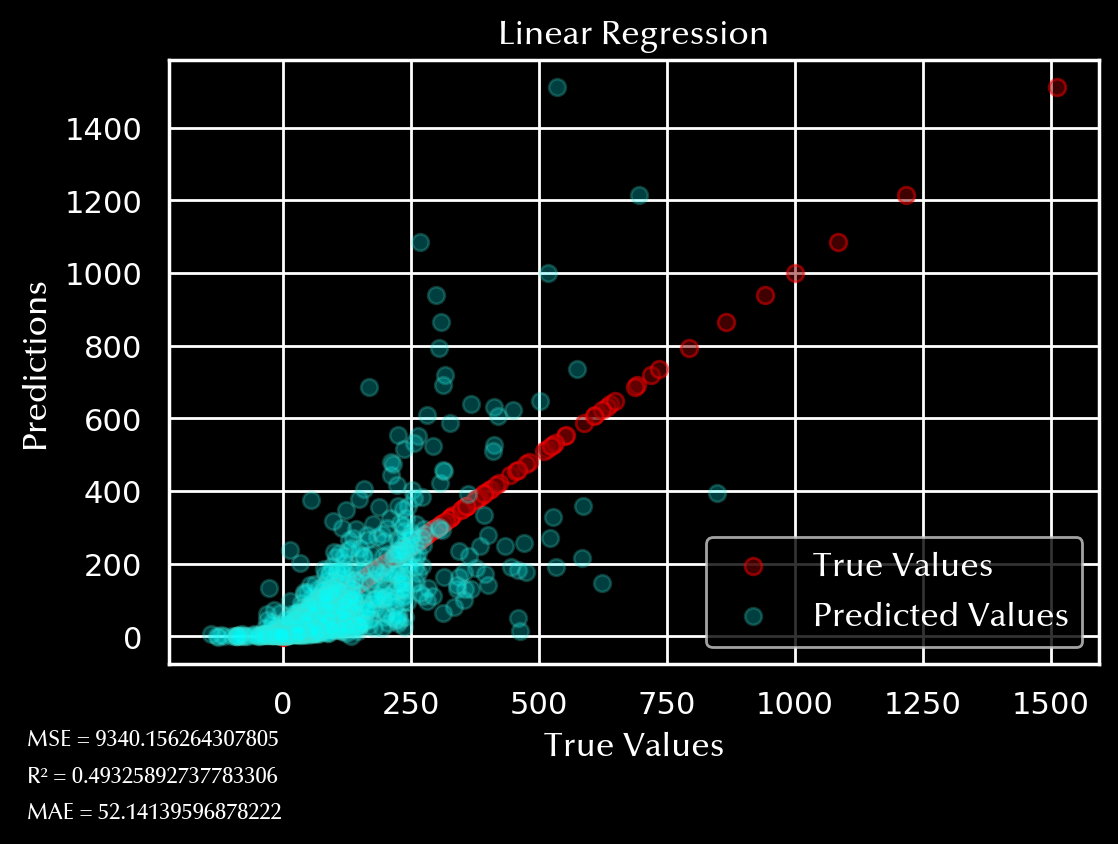

In [131]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Linear Regression', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-500, -300, 'MSE = {}'.format(mse_linear), fontproperties=prop, size=8)
plt.text(-500, -400, 'R² = {}'.format(r2_linear), fontproperties=prop, size=8)
plt.text(-500, -500, 'MAE = {}'.format(mae_linear), fontproperties=prop, size=8)
plt.show()

<font size="5">2. Decision Regression Tree</font>

In [132]:
# Initialisation du modèle de régression par arbre de décision
regressor = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle sur le jeu d'entraînement
regressor.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = regressor.predict(X_test)

# Évaluation du modèle sur le jeu de test
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree = mean_absolute_error(y_test, y_pred)

print("Score R²: ", r2_tree)
print("MSE: ", mse_tree)
print("MAE: ", mae_tree)

Score R²:  0.35004535919391067
MSE:  11979.841851831308
MAE:  45.48530813404778


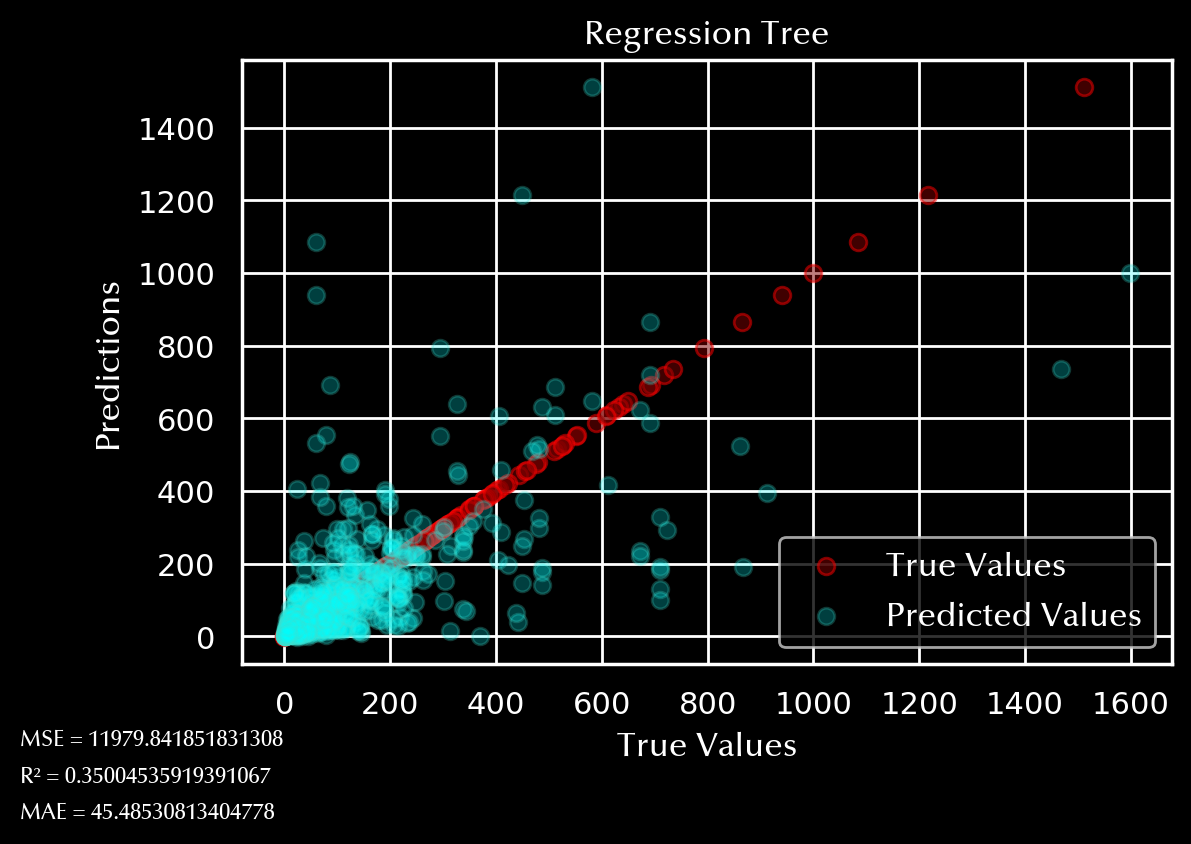

In [133]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Regression Tree', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-500, -300, 'MSE = {}'.format(mse_tree), fontproperties=prop, size=8)
plt.text(-500, -400, 'R² = {}'.format(r2_tree), fontproperties=prop, size=8)
plt.text(-500, -500, 'MAE = {}'.format(mae_tree), fontproperties=prop, size=8)
plt.show()

<font size="5">3. Gradient Boosting</font>

In [134]:
#Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Entraîner le modèle
gbr.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = gbr.predict(X_test)

# Calculer le score MSE et R2
mse_gradient = mean_squared_error(y_test, y_pred)
r2_gradient = r2_score(y_test, y_pred)
mae_gradient = mean_absolute_error(y_test, y_pred)

print("Score MSE: ", mse_gradient)
print("R²: ", r2_gradient)
print("Score MAE: ", mae_gradient)

Score MSE:  8820.863657411432
R²:  0.5214326415188921
Score MAE:  46.8315529143717


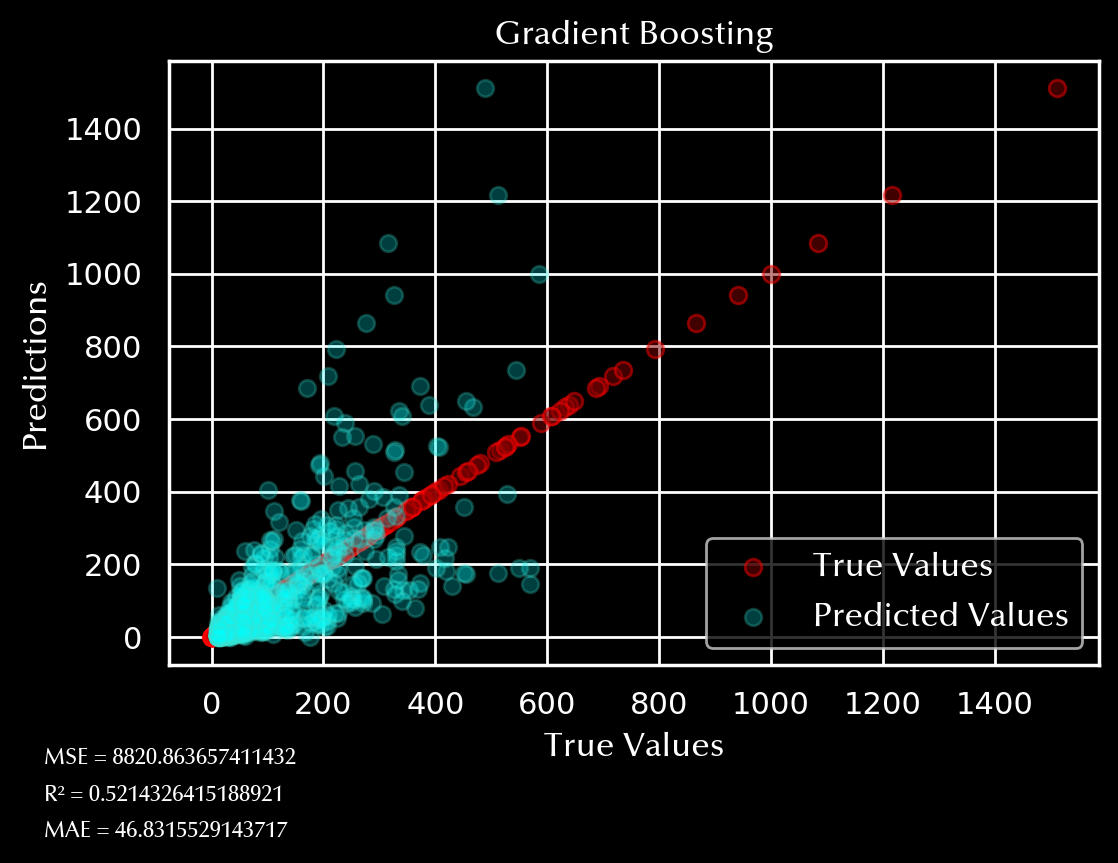

In [135]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Gradient Boosting', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-300, -350, 'MSE = {}'.format(mse_gradient), fontproperties=prop, size=8)
plt.text(-300, -450, 'R² = {}'.format(r2_gradient), fontproperties=prop, size=8)
plt.text(-300, -550, 'MAE = {}'.format(mae_gradient), fontproperties=prop, size=8)
plt.show()

<font size="5">4. Random Forest Regressor</font>

In [136]:
# Instanciation et entraînement du modèle RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)
mae_random_forest = mean_absolute_error(y_test, y_pred)

print("MSE: %.2f" % mse_random_forest)
print("R²: %.2f" % r2_random_forest)
print("MAE: %.2f" % mae_random_forest)

MSE: 7189.98
R²: 0.61
MAE: 35.61


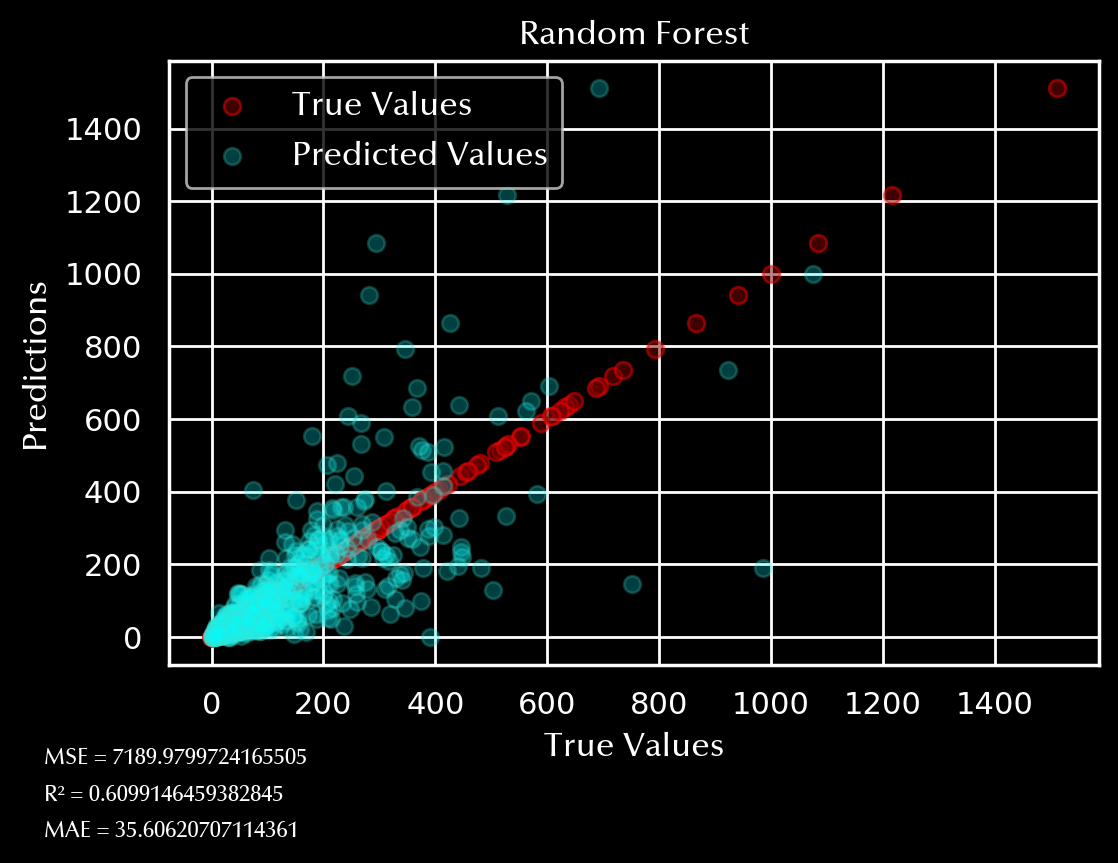

In [137]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Random Forest', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-300, -350, 'MSE = {}'.format(mse_random_forest), fontproperties=prop, size=8)
plt.text(-300, -450, 'R² = {}'.format(r2_random_forest), fontproperties=prop, size=8)
plt.text(-300, -550, 'MAE = {}'.format(mae_random_forest), fontproperties=prop, size=8)
plt.show()

<font size="5">5. XGBoost</font>

In [138]:
# Instanciation et entraînement du modèle XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = xgb.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_xgboost = mean_squared_error(y_test, y_pred)
r2_xgboost = r2_score(y_test, y_pred)
mae_xgboost = mean_absolute_error(y_test, y_pred)

print("MSE: %.2f" % mse_xgboost)
print("R2: %.2f" % r2_xgboost)
print("MAE: %.2f" % mae_xgboost)

MSE: 6879.39
R2: 0.63
MAE: 34.04


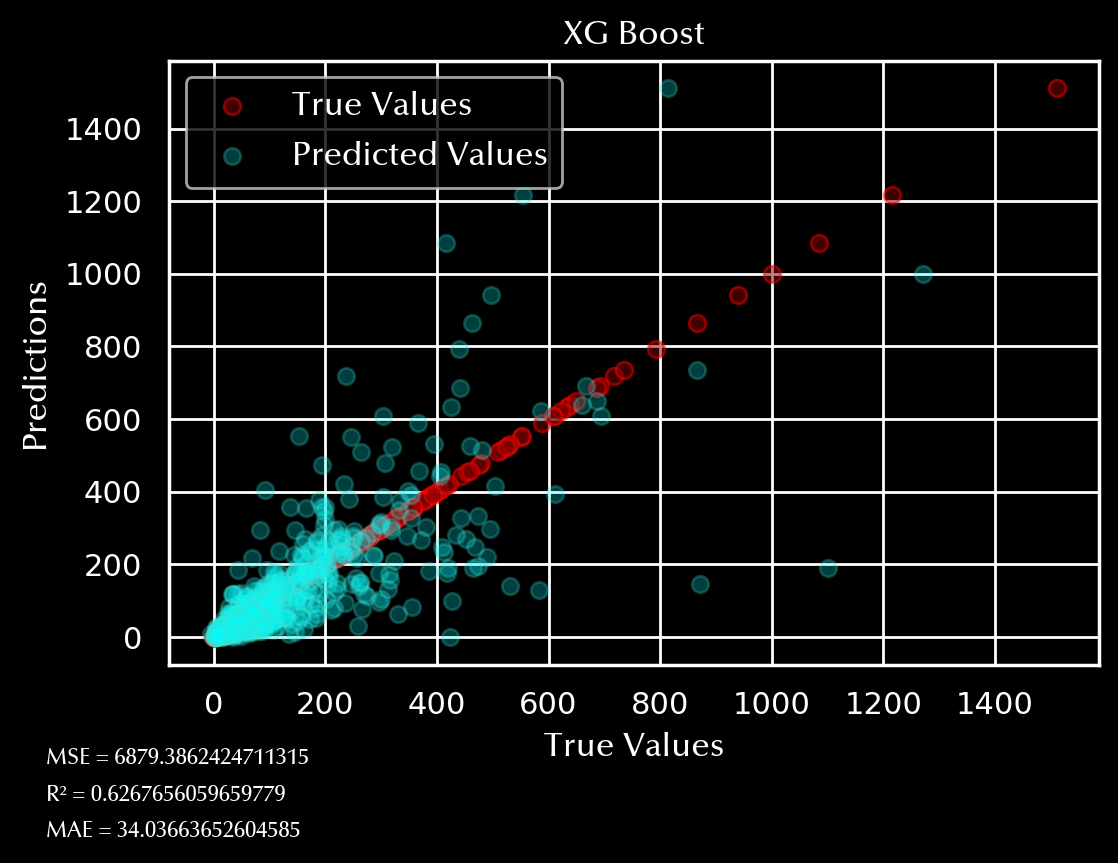

In [139]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('XG Boost', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-300, -350, 'MSE = {}'.format(mse_xgboost), fontproperties=prop, size=8)
plt.text(-300, -450, 'R² = {}'.format(r2_xgboost), fontproperties=prop, size=8)
plt.text(-300, -550, 'MAE = {}'.format(mae_xgboost), fontproperties=prop, size=8)
plt.show()

In [140]:
# si jamais le spiderchart ne s'affiche pas, executer cette ligne pour rétablir la connection
from plotly.offline import iplot, init_notebook_mode; init_notebook_mode(connected=True)

In [141]:
# affichage en spiderchart des scores r2 des algorithmes
data = [
    {'r': r2_linear, 'theta': 'LinearRegression'},
    {'r': r2_tree, 'theta': 'DecisionTreeRegressor'},
    {'r': r2_random_forest, 'theta': 'RandomForest'},
    {'r': r2_gradient, 'theta': 'GradientBoost'},
    {'r': r2_xgboost, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score R2 pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,1], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [142]:
# on vérifie que XGBoost possède le meilleur score r2
if r2_xgboost > r2_gradient and r2_xgboost and r2_tree and r2_xgboost > r2_linear and r2_xgboost > r2_random_forest:
    print('True')
else:
    print('False')

True


In [143]:
# affichage en spiderchart des scores MSE des algorithmes
df = pd.DataFrame(dict(
    r=[mse_linear/10e3, mse_tree/10e3, mse_random_forest/10e3, mse_gradient/10e3, mse_xgboost/10e3],
    theta=['LinearRegression','DecisionTreeRegressor','RandomForest',
           'GradientBoost', 'XGBoost']))

fig = px.line_polar(df, r='r', theta='theta',title="Score MSE pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,1], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [144]:
mse_xgboost > mse_random_forest

False

In [145]:
# affichage en spiderchart des scores MAE des algorithmes
data = [
    {'r': mae_linear, 'theta': 'LinearRegression'},
    {'r': mae_tree, 'theta': 'DecisionTreeRegressor'},
    {'r': mae_random_forest, 'theta': 'RandomForest'},
    {'r': mae_gradient, 'theta': 'GradientBoost'},
    {'r': mae_xgboost, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score MAE pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,60], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)
# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [146]:
mae_xgboost > mae_random_forest

False

In [147]:
mae_xgboost - mae_random_forest

-1.5695705450977613

<font size="5">6. GridSearchCV</font>

In [148]:
# GridSeachCV -> Utilisé pour trouver les meilleurs hyperpramètres du modèle
# Définition du modèle LinearRegression
model_linear = LinearRegression()

# Paramètres à tester
parameters = {'fit_intercept':[True, False]}

# Définition de la grille de recherche
grid_linear = GridSearchCV(model_linear, parameters, cv=6)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_linear.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_lr = grid_linear.best_estimator_

# Prédictions sur les données de test
y_pred_lr_best_model = best_model_lr.predict(X_test)

# Calcul de MSE et MAE
mse_linear_regression_best_model = mean_squared_error(y_test, y_pred_lr_best_model)
mae_linear_regression_best_model = mean_absolute_error(y_test, y_pred_lr_best_model)

# Comparaison avec XGBoost
mse_xgboost > mse_linear_regression_best_model

False

In [149]:
# Définition du modèle GradientBoosting
model_gbr = GradientBoostingRegressor(random_state=42)

# Paramètres à tester
parameters = {'n_estimators':[1,50,100], 'learning_rate':[0.1,0.01], 'max_depth':[1,5]}

# Définition de la grille de recherche
grid_gbr = GridSearchCV(model_gbr, parameters, cv=6)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_gbr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_gbr = grid_gbr.best_estimator_

# Prédictions sur les données de test
y_pred_gbr_best_model = best_model_gbr.predict(X_test)

# Calcul de MSE et MAE
mse_gbr_best_model = mean_squared_error(y_test, y_pred_gbr_best_model)
mae_gbr_best_model = mean_absolute_error(y_test, y_pred_gbr_best_model)

# Comparaison avec XGBoost
mse_gbr_best_model > mse_xgboost

False

In [150]:
grid_gbr.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [151]:
# Définition du modèle de régression par arbre de décision
model_dtr = DecisionTreeRegressor(random_state=42)

# Paramètres à tester
parameters = {'max_depth': [1, 5, 10], 'min_samples_split': [2, 5, 10]}

# Définition de la grille de recherche
grid_dtr = GridSearchCV(model_dtr, parameters, cv=6)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_dtr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_dtr = grid_dtr.best_estimator_

# Prédictions sur les données de test
y_pred_dtr_best_model = best_model_dtr.predict(X_test)

# Calcul de MSE et MAE
mse_dtr_best_model = mean_squared_error(y_test, y_pred_dtr_best_model)
mae_dtr_best_model = mean_absolute_error(y_test, y_pred_dtr_best_model)

# Comparaison avec XGBoost
mse_dtr_best_model > mse_xgboost

True

In [152]:
# Définition du modèle de régression par random forest
model_rfr = RandomForestRegressor(random_state=42)

# Paramètres à tester
parameters = {'n_estimators':[10, 50, 100], 'max_depth':[1, 5, 10], 'min_samples_split':[2, 5, 10]}

# Définition de la grille de recherche
grid_rfr = GridSearchCV(model_rfr, parameters, cv=6)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_rfr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_rfr = grid_rfr.best_estimator_

# Prédictions sur les données de test
y_pred_rfr_best_model = best_model_rfr.predict(X_test)

# Calcul de MSE et MAE
mse_rfr_best_model = mean_squared_error(y_test, y_pred_rfr_best_model)
mae_rfr_best_model = mean_absolute_error(y_test, y_pred_rfr_best_model)

# Comparaison avec XGBoost
mse_rfr_best_model > mse_xgboost

True

In [153]:
mse_rfr_best_model

7302.184792096939

In [154]:
grid_rfr.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [155]:
# Définition du modèle de régression XGBoost
model_xgb = XGBRegressor(random_state=42)

# Paramètres à tester
parameters = {'n_estimators': [50,100,200], 'learning_rate': [0.1,0.05,0.01], 'max_depth': [3,6,9]}

# Définition de la grille de recherche
grid_xgb = GridSearchCV(model_xgb, parameters, cv=6)

# Recherche des meilleurs paramètres sur les données d'entraînement
grid_xgb.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_xgb = grid_xgb.best_estimator_

# Prédictions sur les données de test
y_pred_xgb_best_model = best_model_xgb.predict(X_test)

# Calcul de MSE et MAE
mse_xgb_best_model = mean_squared_error(y_test, y_pred_xgb_best_model)
mae_xgb_best_model = mean_absolute_error(y_test, y_pred_xgb_best_model)

# Comparaison avec XGBoost
mse_xgb_best_model > mse_xgboost

False

In [156]:
data = [
    {'r': mse_linear_regression_best_model, 'theta': 'LinearRegression'},
    {'r': mse_dtr_best_model, 'theta': 'DecisionTreeRegressor'},
    {'r': mse_rfr_best_model, 'theta': 'RandomForest'},
    {'r': mse_gbr_best_model, 'theta': 'GradientBoost'},
    {'r': mse_xgb_best_model, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score MSE pour les algorithmes après GridSearchCV", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,10000], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)
# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [157]:
mse_xgb_best_model > mse_rfr_best_model

False

In [172]:
data = [
    {'r': mae_linear_regression_best_model, 'theta': 'LinearRegression'},
    {'r': mae_dtr_best_model, 'theta': 'DecisionTreeRegressor'},
    {'r': mae_rfr_best_model, 'theta': 'RandomForest'},
    {'r': mae_gbr_best_model, 'theta': 'GradientBoost'},
    {'r': mae_xgb_best_model, 'theta': 'XGBoost'}
]
fig = px.line_polar(data, r='r', theta='theta',title="Score MAE pour les algorithmes après GridSearchCV", line_close=True, template='plotly_dark', color_discrete_sequence=['royalblue'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,50], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)
# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [159]:
mae_xgb_best_model > mae_rfr_best_model

False

In [173]:
r2_xgboost_best = r2_score(y_test, y_pred_xgb_best_model)
r2_random_forest_best = r2_score(y_test, y_pred_rfr_best_model)
r2_xgboost_best > r2_random_forest_best

True

# CHOIX DE L'ALGORITHME FINAL : XGBOOST

# <a name="C3">III. Feature Importance</a>

<font size="5">1. XGBoost Feature Importance</font>

In [160]:
importance = best_model_xgb.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
24                 PrimaryPropertyType_Large Office    0.193063
5                                  Electricity(kWh)    0.171104
17                   BuildingType_SPS-District K-12    0.104561
34                 PrimaryPropertyType_Retail Store    0.059747
4                                  SiteEUI(kBtu/sf)    0.058511
2                                  PropertyGFATotal    0.045357
12                BuildingType_Multifamily LR (1-4)    0.038828
21                        PrimaryPropertyType_Hotel    0.036016
9                            RatioFloorsPerBuilding    0.035481
37  PrimaryPropertyType_Small- and Mid-Sized Office    0.029299
14                      BuildingType_NonResidential    0.028771
15                  BuildingType_Nonresidential COS    0.025631
6                                   ENERGYSTARScore    0.023642
1                                    NumberofFloors    0.017252
11                BuildingType_Multifami

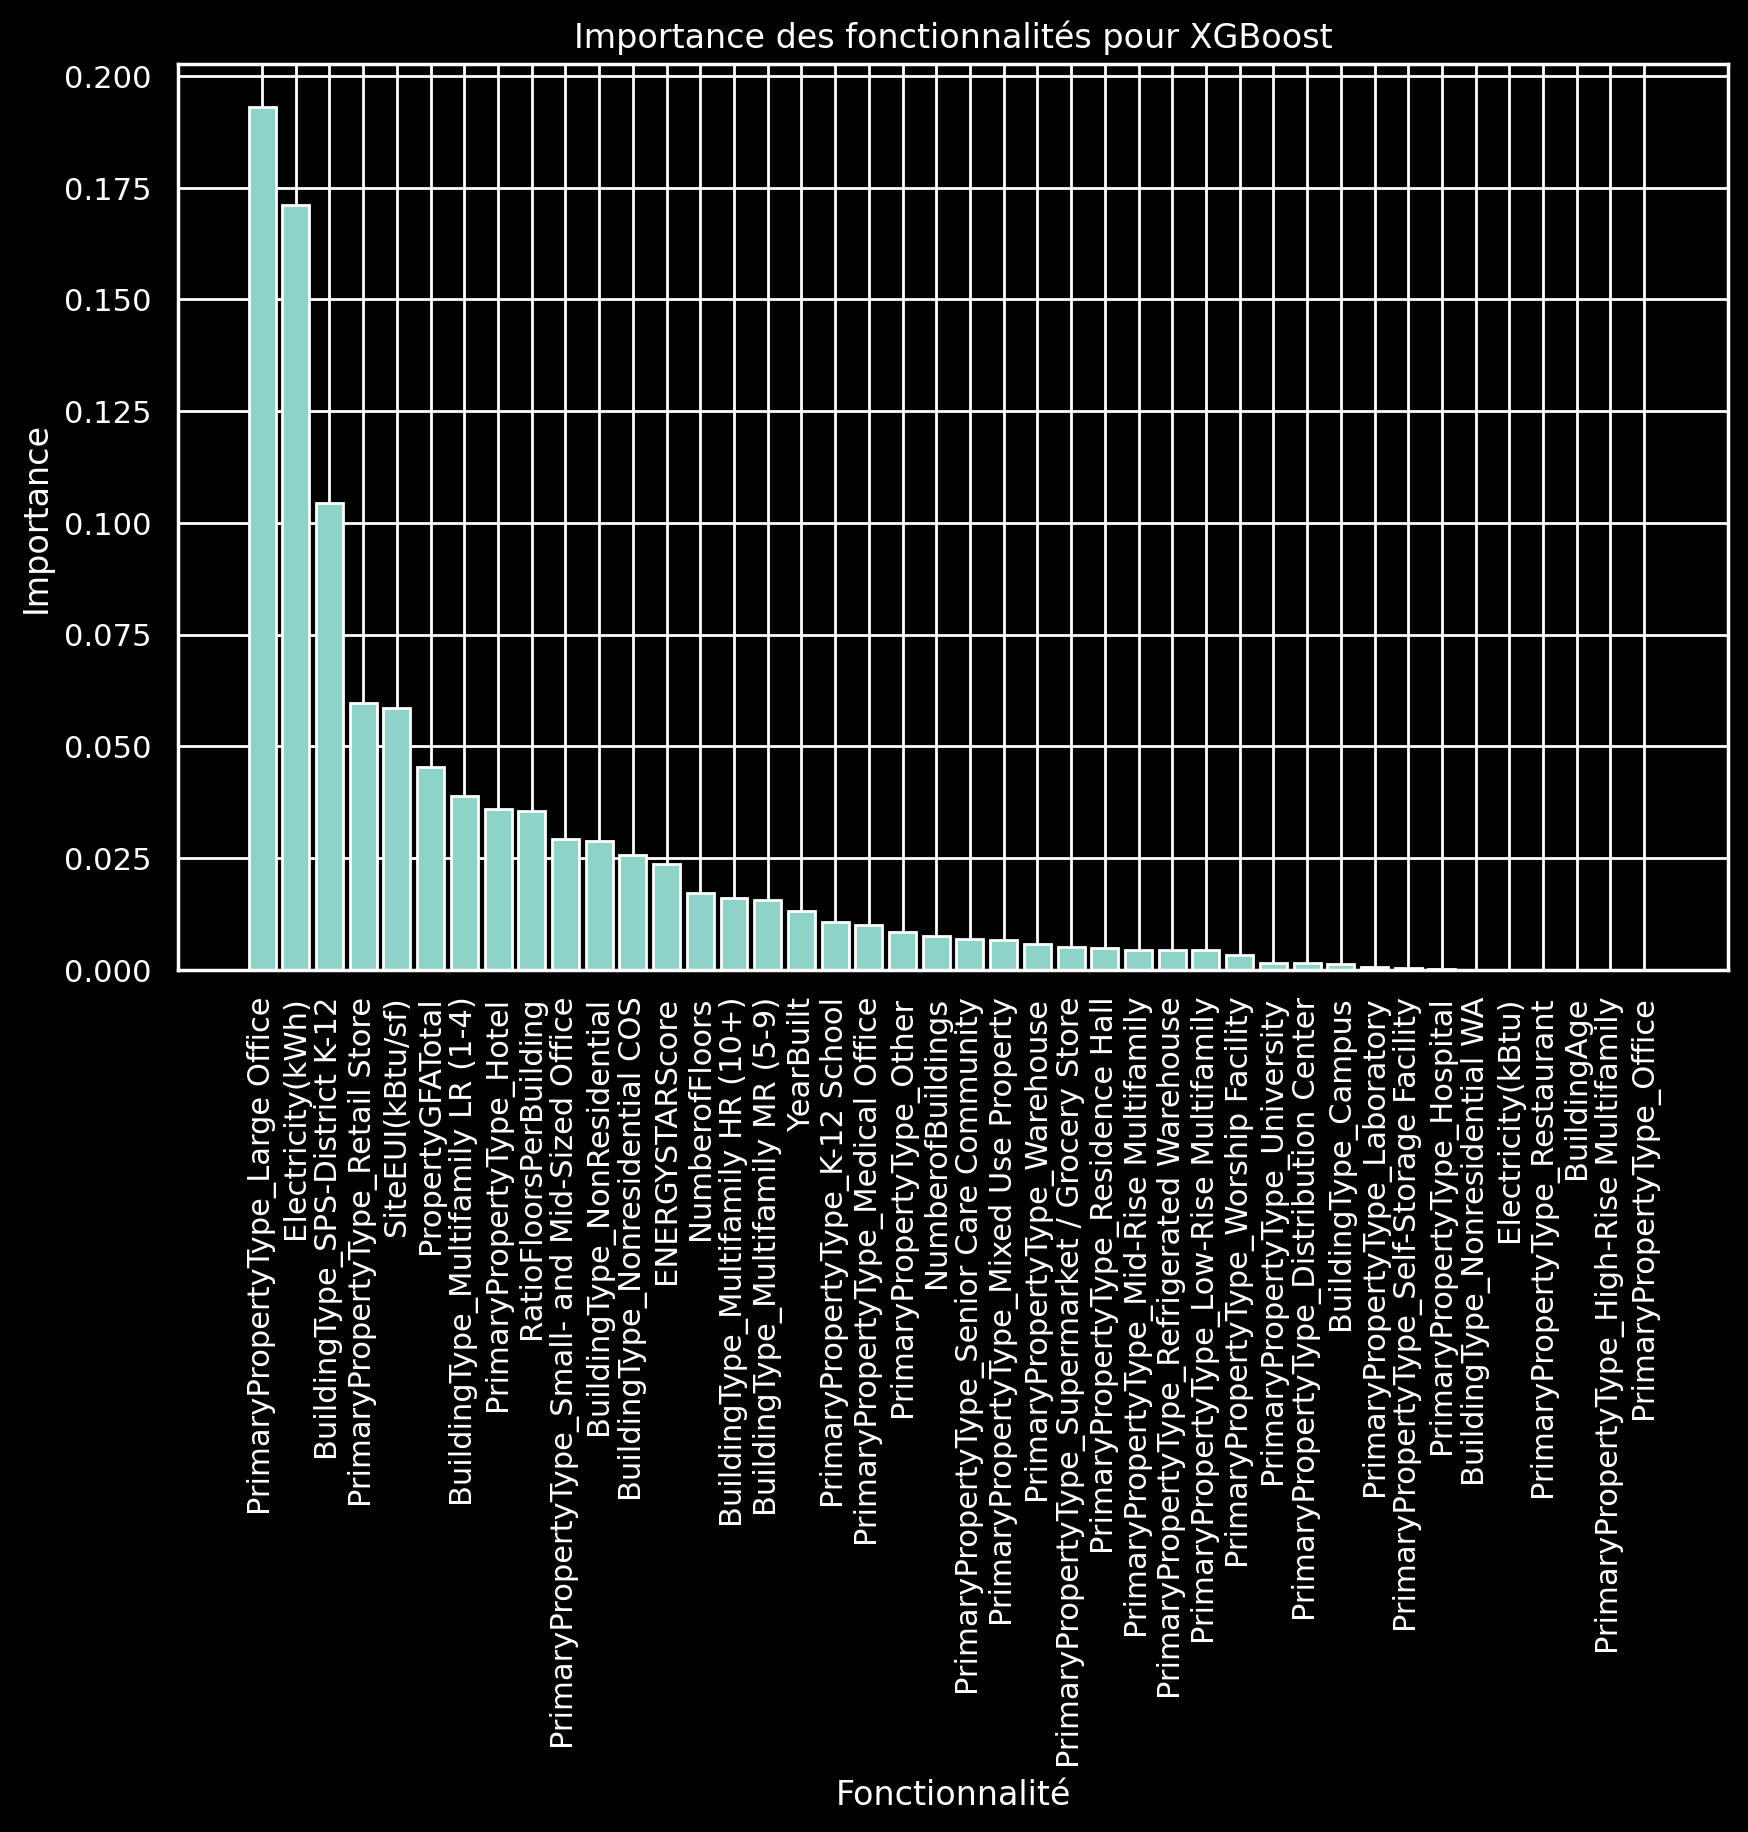

In [161]:
importance = best_model_xgb.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour XGBoost')

# afficher le graphique
plt.show()

<font size="5">2. LinearRegression Feature Importance</font>

In [162]:
# ici on utiliser la méthode .coef_ plutot que feature_importances_
importance = abs(best_model_lr.coef_)
feature_importance = pd.DataFrame(list(zip(X.columns, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

print(feature_importance)

                                            feature    importance
20                     PrimaryPropertyType_Hospital  4.051722e+02
23                   PrimaryPropertyType_Laboratory  2.285629e+02
24                 PrimaryPropertyType_Large Office  1.802624e+02
31       PrimaryPropertyType_Refrigerated Warehouse  1.159843e+02
37  PrimaryPropertyType_Small- and Mid-Sized Office  8.257669e+01
29                       PrimaryPropertyType_Office  7.977151e+01
4                                  SiteEUI(kBtu/sf)  6.635432e+01
34                 PrimaryPropertyType_Retail Store  6.313570e+01
21                        PrimaryPropertyType_Hotel  6.054218e+01
39                   PrimaryPropertyType_University  5.545748e+01
28           PrimaryPropertyType_Mixed Use Property  4.823645e+01
26               PrimaryPropertyType_Medical Office  4.163887e+01
36        PrimaryPropertyType_Senior Care Community  3.289953e+01
5                                  Electricity(kWh)  3.107779e+01
30        

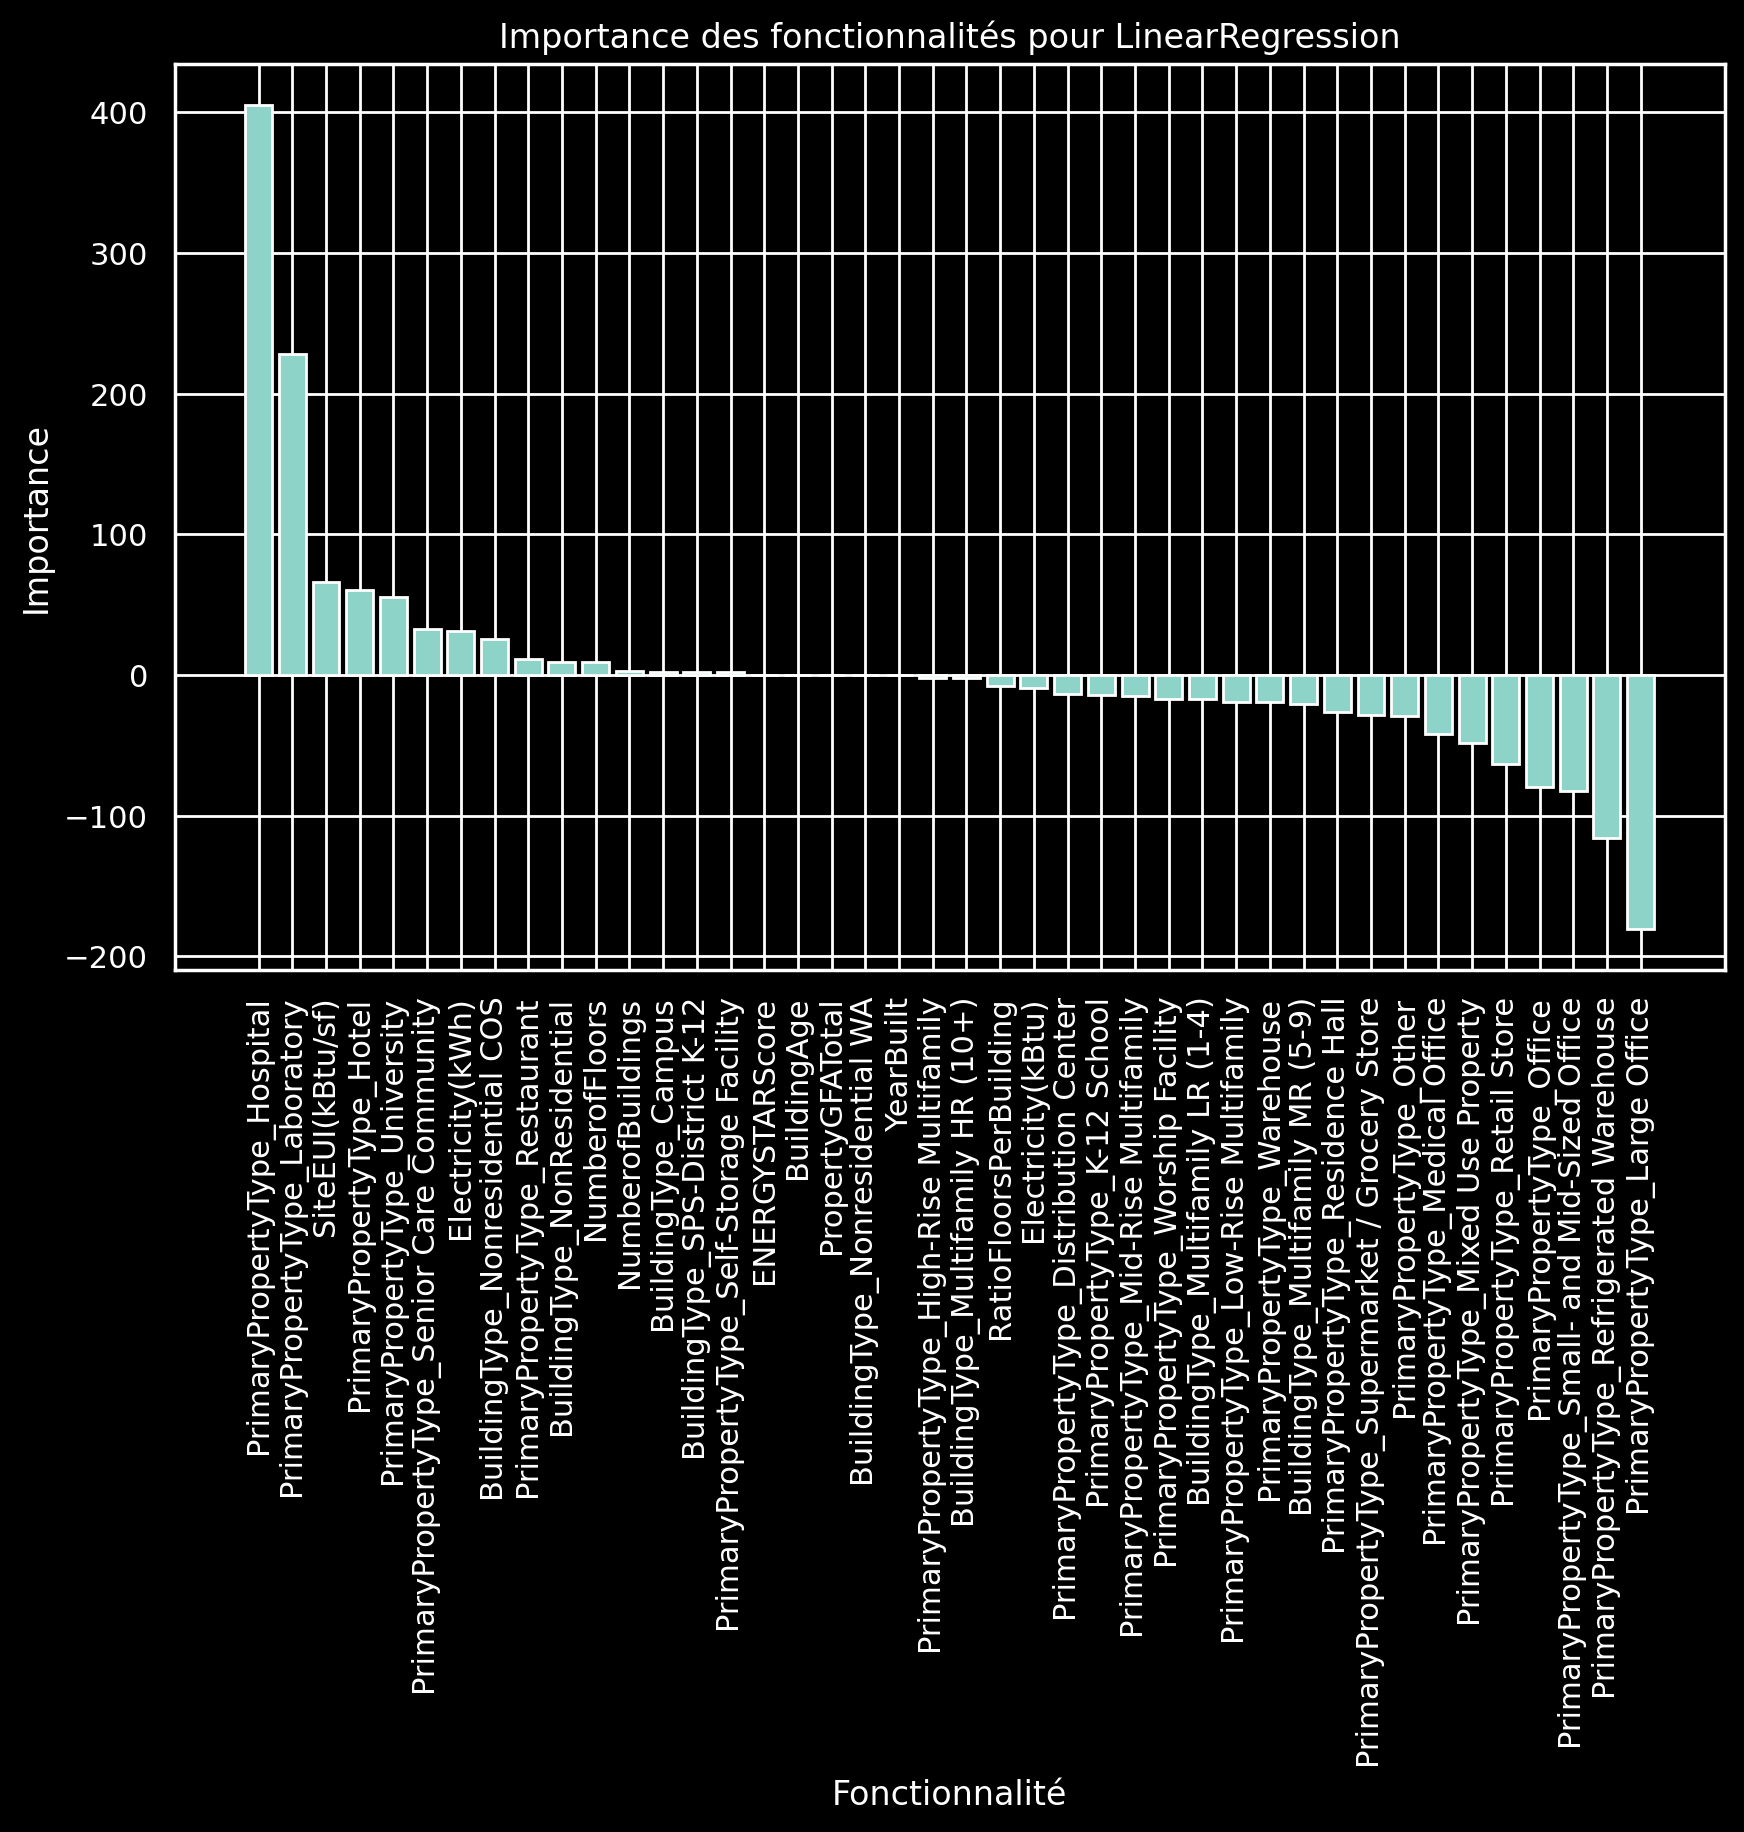

In [163]:
importance = best_model_lr.coef_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour LinearRegression')

# afficher le graphique
plt.show()

<font size="5">3. Gradient Boosting Feature Importance</font>

In [164]:
importance = best_model_gbr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
5                                  Electricity(kWh)    0.230524
4                                  SiteEUI(kBtu/sf)    0.208144
2                                  PropertyGFATotal    0.179121
7                                 Electricity(kBtu)    0.147839
24                 PrimaryPropertyType_Large Office    0.056106
6                                   ENERGYSTARScore    0.047127
9                            RatioFloorsPerBuilding    0.035236
8                                       BuildingAge    0.029045
0                                         YearBuilt    0.025727
1                                    NumberofFloors    0.012234
21                        PrimaryPropertyType_Hotel    0.006949
37  PrimaryPropertyType_Small- and Mid-Sized Office    0.003359
34                 PrimaryPropertyType_Retail Store    0.001833
14                      BuildingType_NonResidential    0.001758
12                BuildingType_Multifami

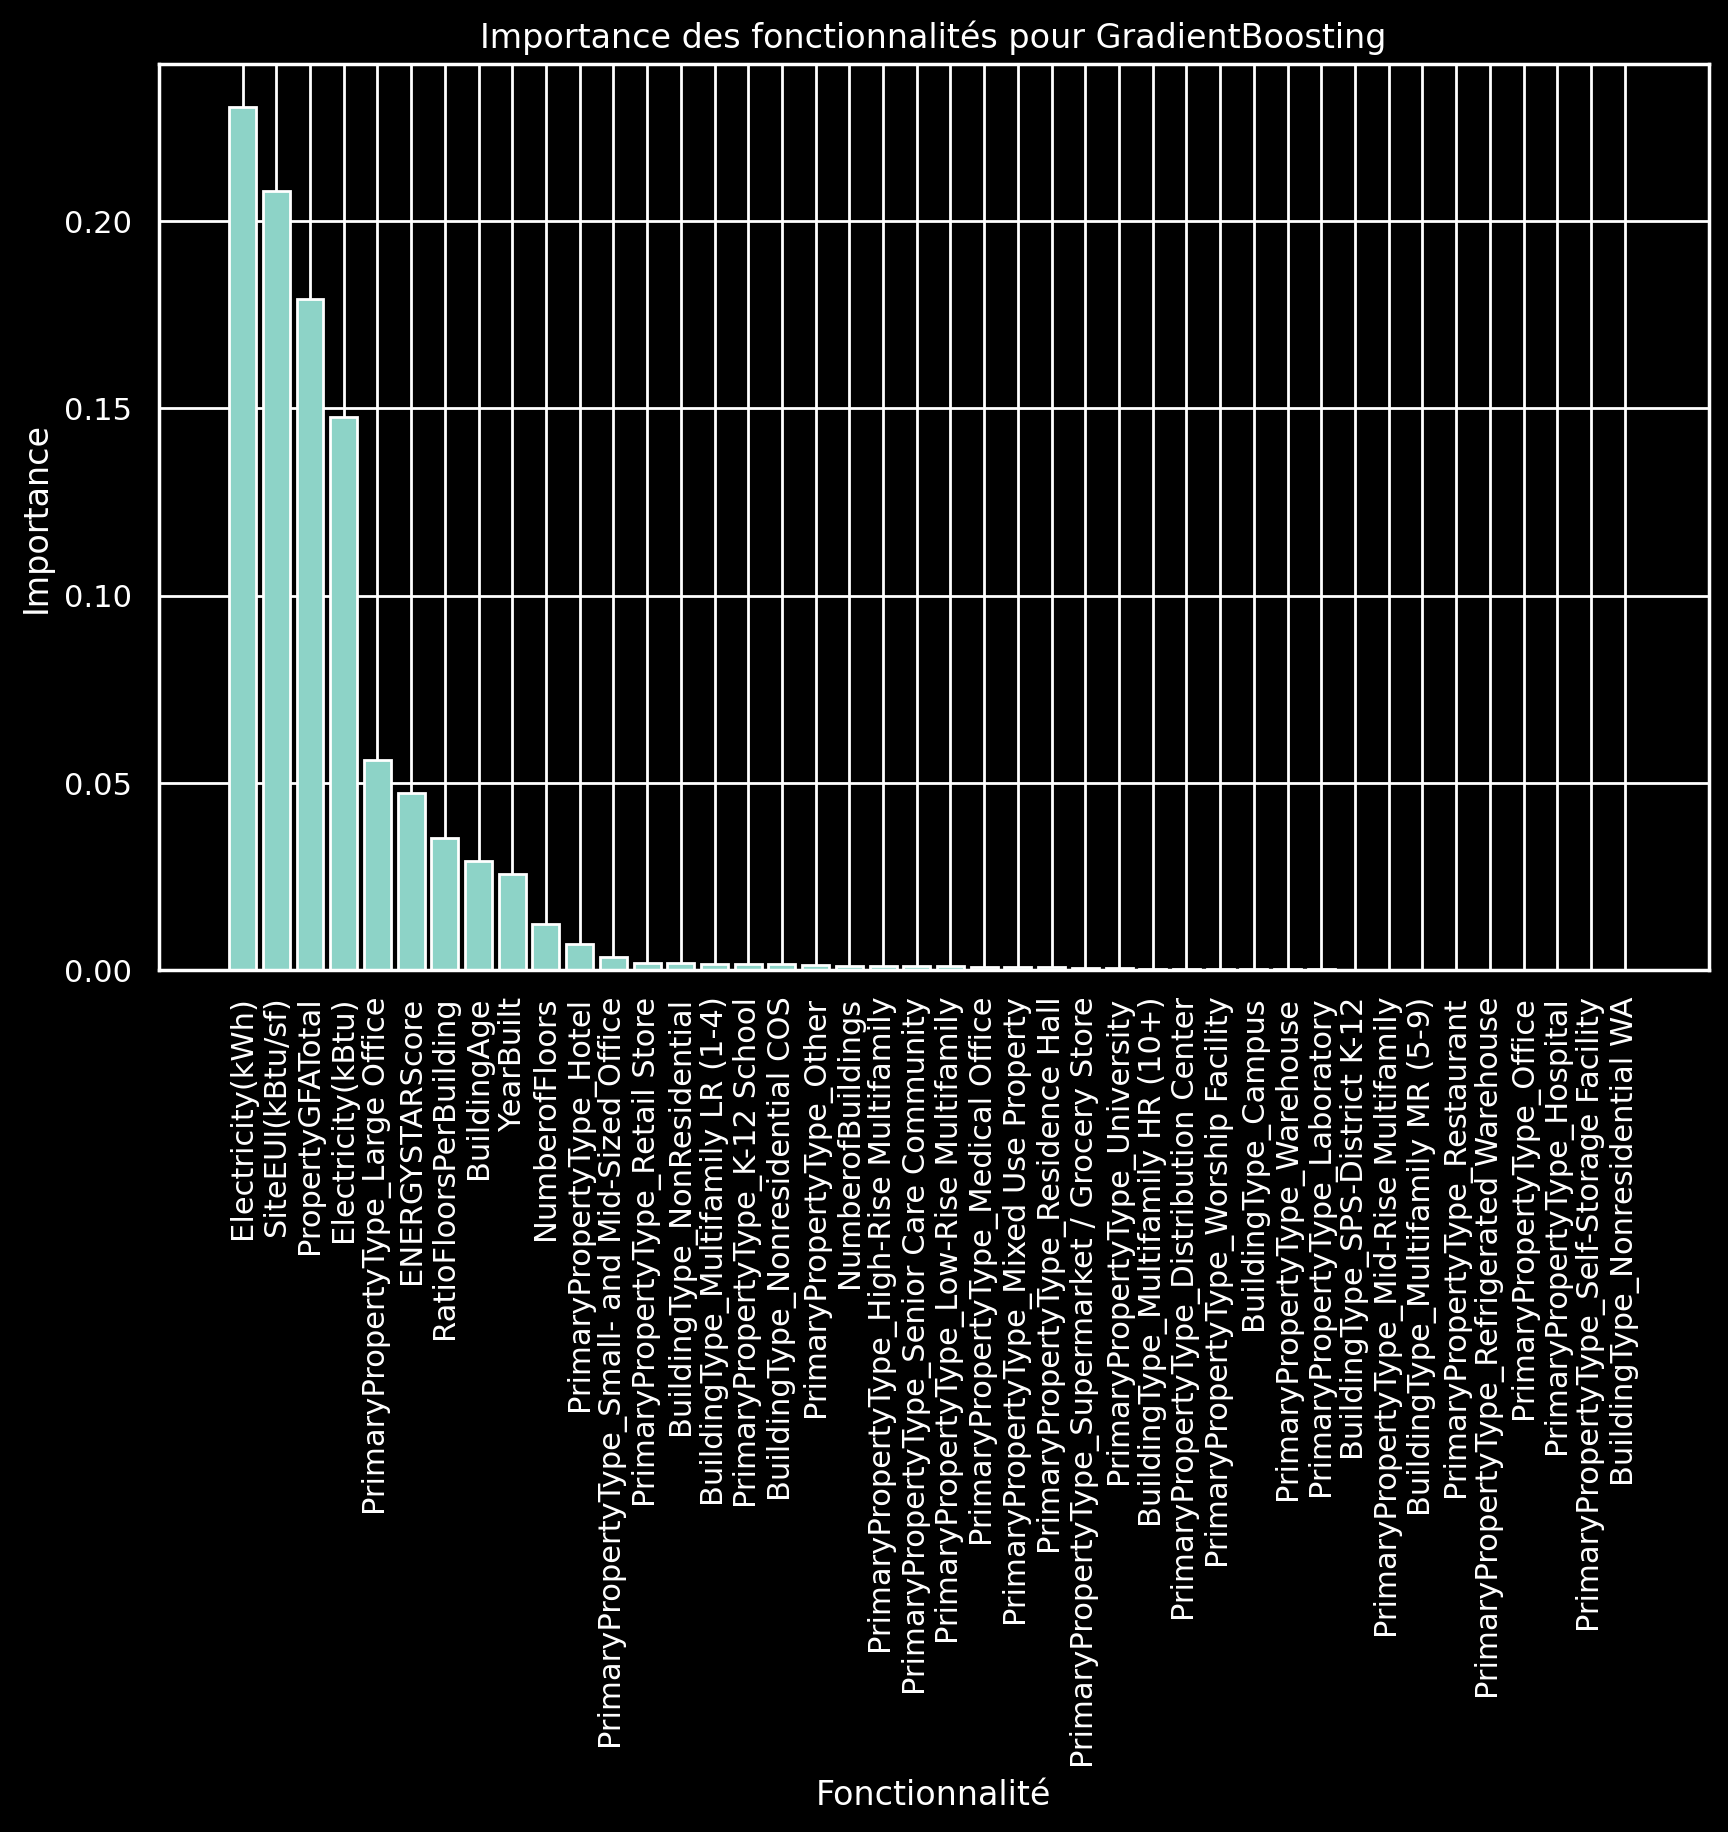

In [165]:
importance = best_model_gbr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour GradientBoosting')

# afficher le graphique
plt.show()

<font size="5">4. RandomForest Feature Importance</font>

In [166]:
importance = best_model_rfr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
7                                 Electricity(kBtu)    0.252403
5                                  Electricity(kWh)    0.214708
4                                  SiteEUI(kBtu/sf)    0.171092
2                                  PropertyGFATotal    0.131174
6                                   ENERGYSTARScore    0.055909
24                 PrimaryPropertyType_Large Office    0.034674
9                            RatioFloorsPerBuilding    0.027260
8                                       BuildingAge    0.024848
0                                         YearBuilt    0.023441
1                                    NumberofFloors    0.019029
21                        PrimaryPropertyType_Hotel    0.011161
3                                 NumberofBuildings    0.004495
30                        PrimaryPropertyType_Other    0.004232
14                      BuildingType_NonResidential    0.003910
39                   PrimaryPropertyType

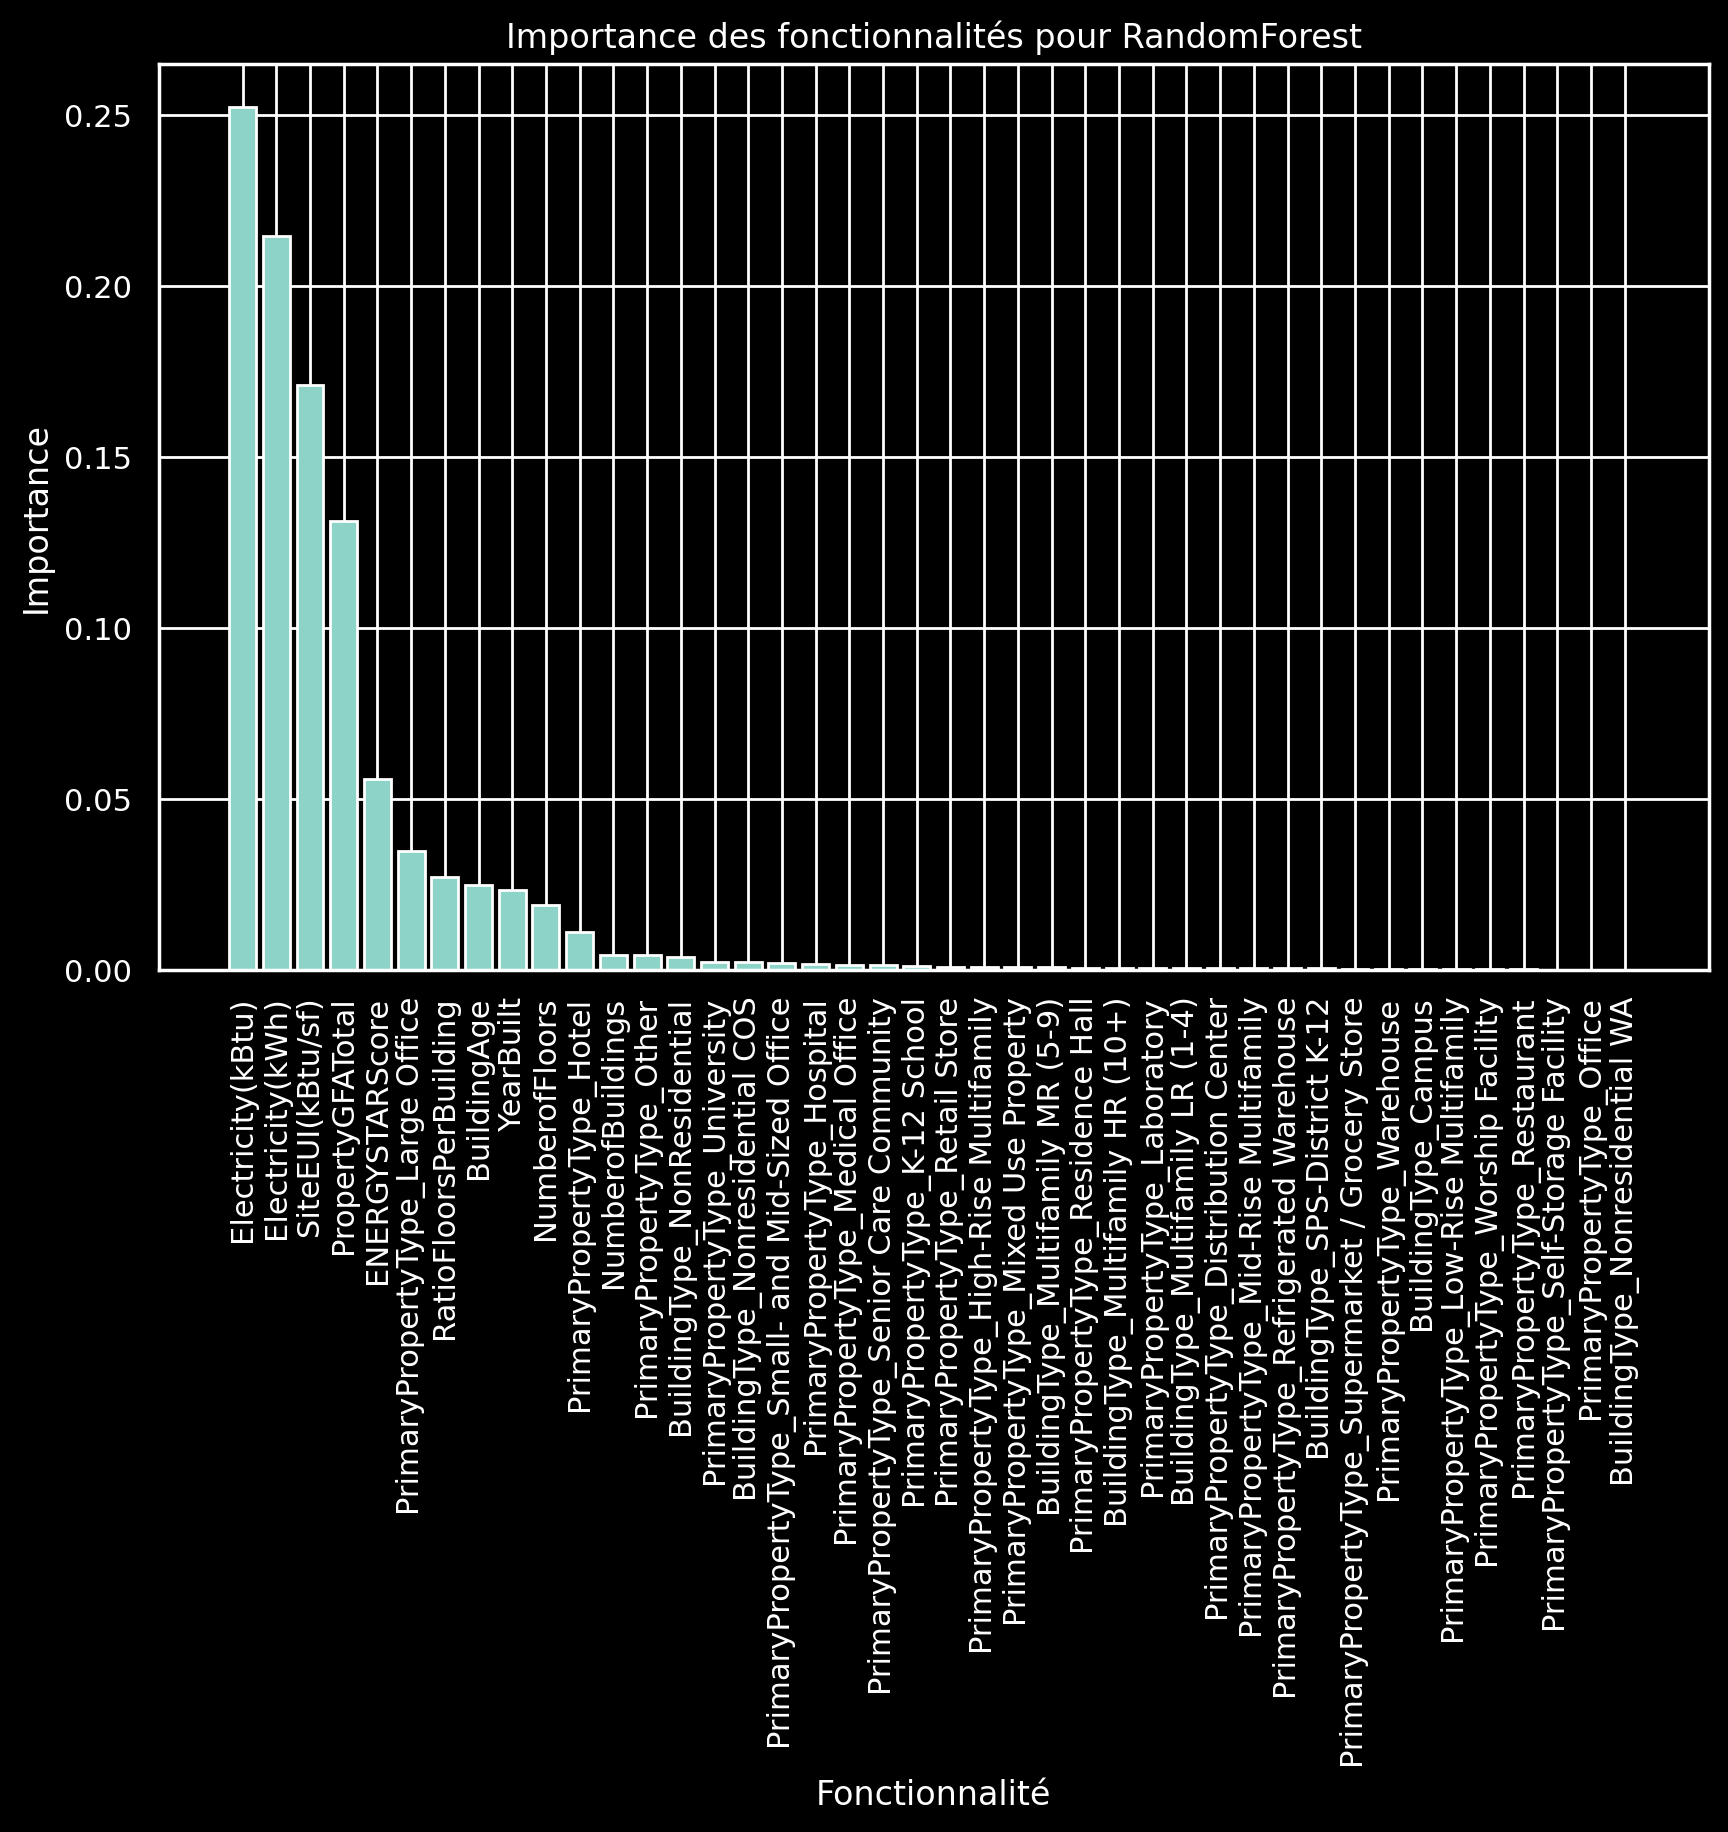

In [167]:
importance = best_model_rfr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour RandomForest')

# afficher le graphique
plt.show()

<font size="5">5. DecisionTreeRegressor Feature Importance</font>

In [168]:
importance = best_model_dtr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)

                                            feature  importance
7                                 Electricity(kBtu)    0.441698
4                                  SiteEUI(kBtu/sf)    0.213437
2                                  PropertyGFATotal    0.102150
5                                  Electricity(kWh)    0.091098
24                 PrimaryPropertyType_Large Office    0.090972
1                                    NumberofFloors    0.027382
8                                       BuildingAge    0.018339
6                                   ENERGYSTARScore    0.010942
9                            RatioFloorsPerBuilding    0.003982
33                   PrimaryPropertyType_Restaurant    0.000000
27         PrimaryPropertyType_Mid-Rise Multifamily    0.000000
28           PrimaryPropertyType_Mixed Use Property    0.000000
29                       PrimaryPropertyType_Office    0.000000
30                        PrimaryPropertyType_Other    0.000000
31       PrimaryPropertyType_Refrigerate

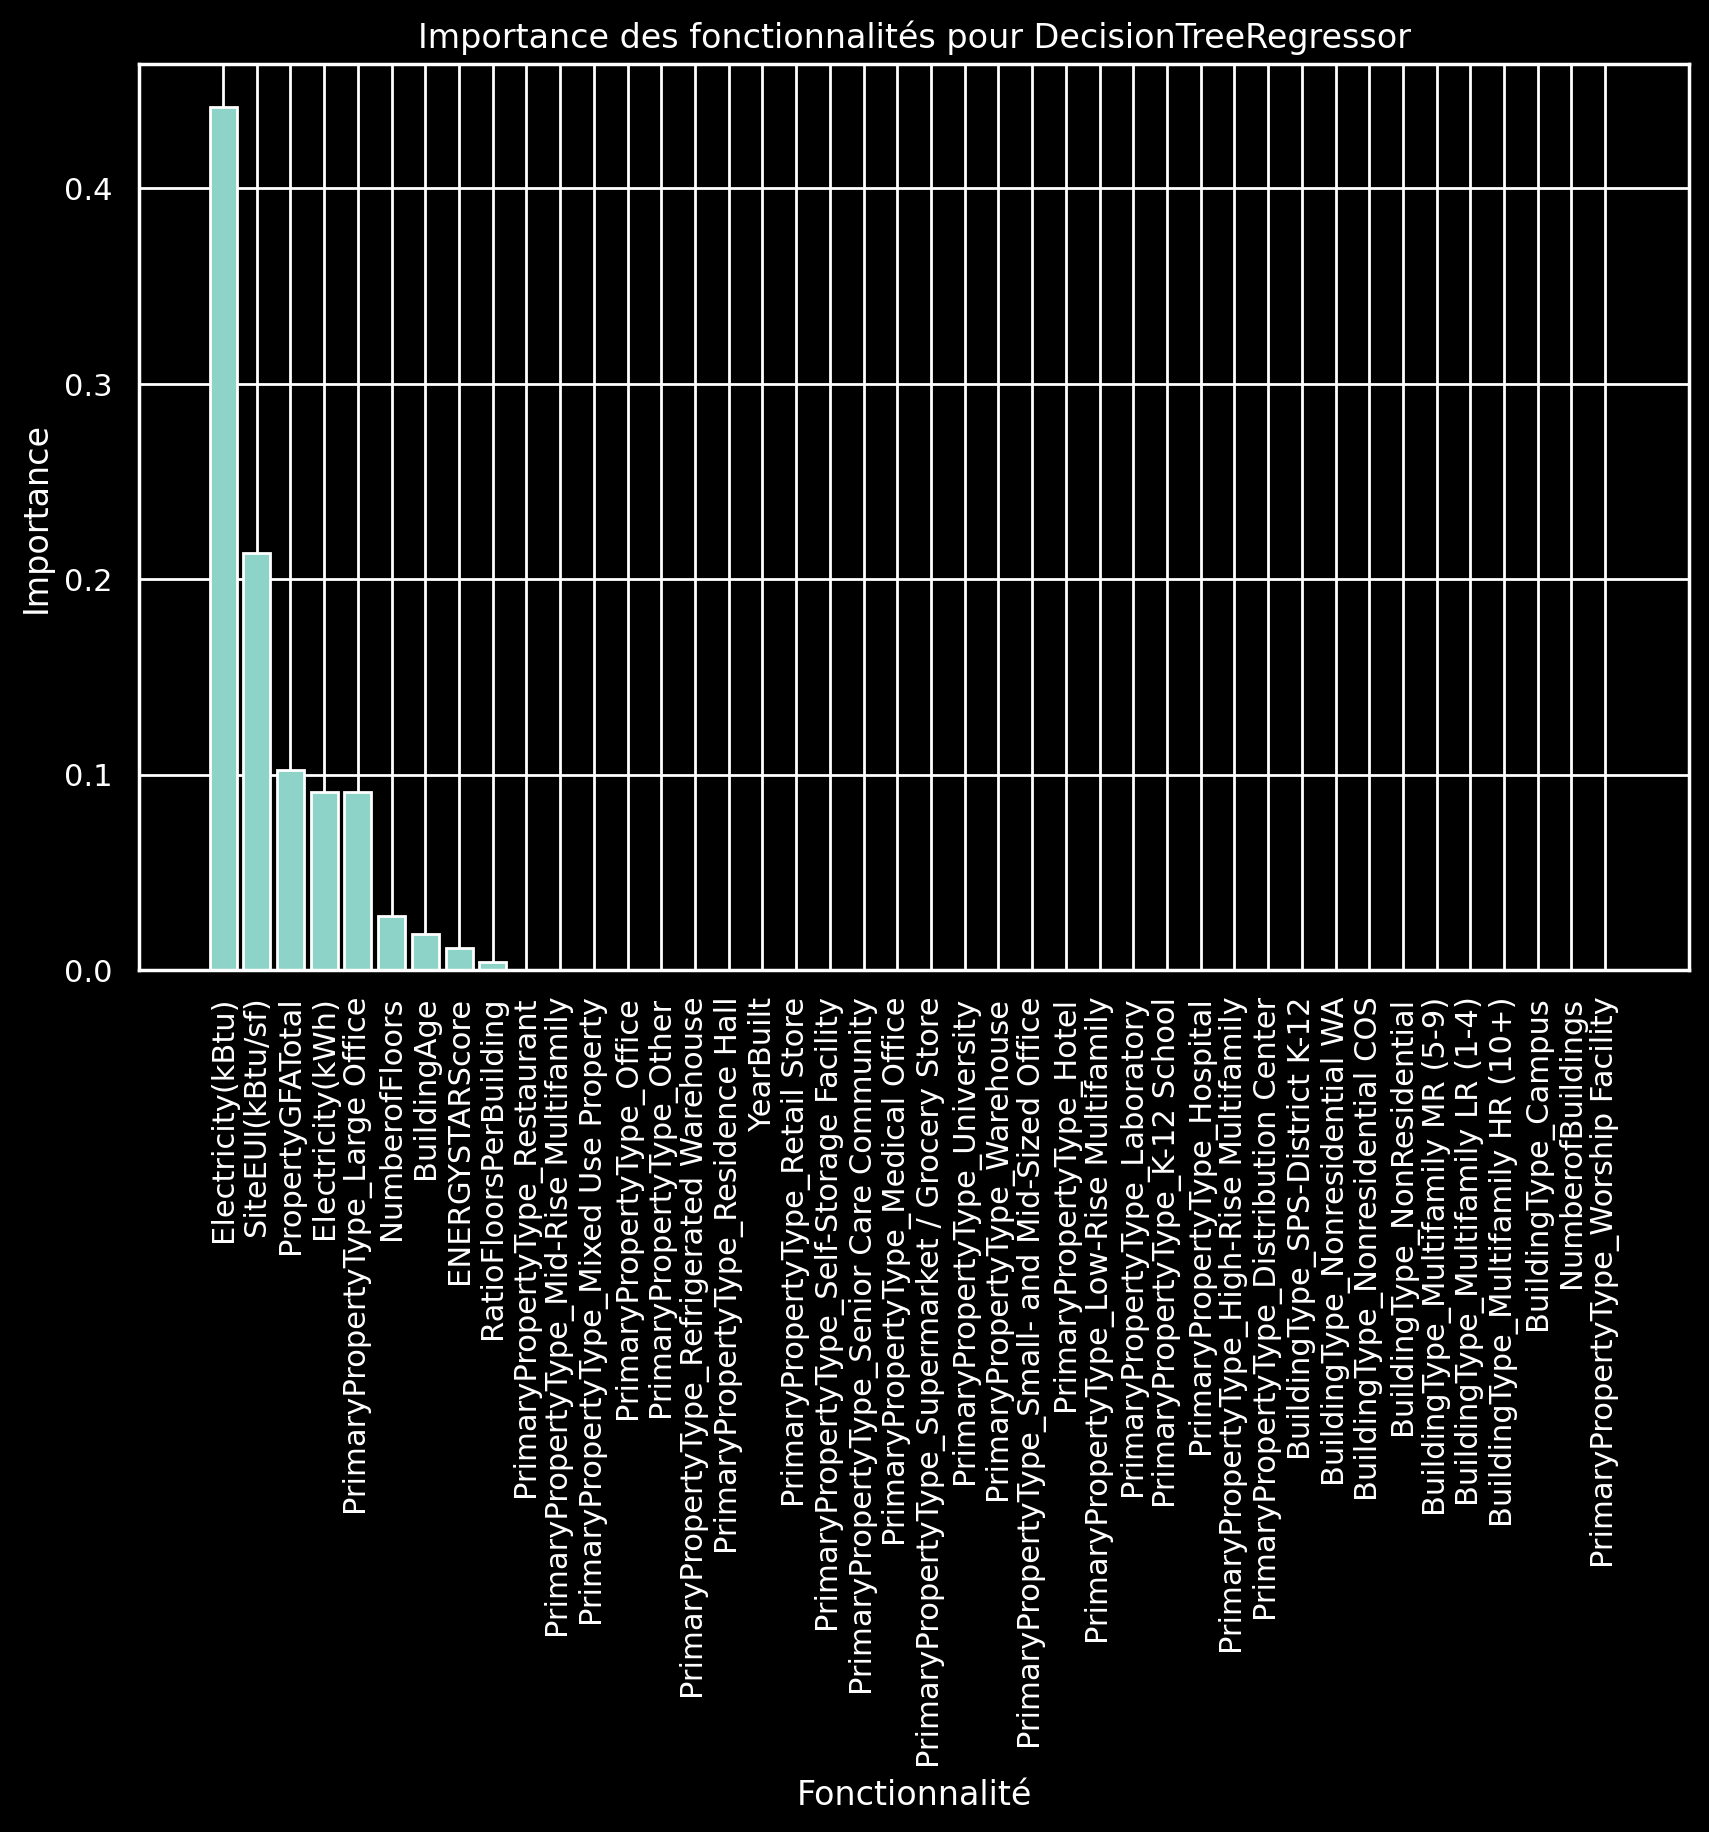

In [169]:
importance = best_model_dtr.feature_importances_
feature_importance = pd.DataFrame(list(zip(X, importance)), columns=["feature", "importance"])
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Fonctionnalité')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités pour DecisionTreeRegressor')

# afficher le graphique
plt.show()

<font size="5">6. Pertinence de l'ENERGYStarScore</font>

Nous avons pu voir en analysant les features importances que l'ENERGYStarScore est un peu plus pertinent pour la prédiction d'émission de C02 que pour la prédiction de l'énergie mais il reste toujours assez peu imposant pour influencer assez les prédictions.

En conclusion, cette variable n'est pas pertinente non plus pour la prédiction d'émission de CO2
